In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.patches as mpatches
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import re
import scikit_posthocs as sp
from statsmodels.stats.anova import anova_lm
import scikit_posthocs as sp

new_day = datetime.datetime.now().strftime("%Y%m%d")
path = "../../analysis/plots/revision_lineplots/"

run_type = "dry"
#run_type = "wet"

organ = "ILE"
#organ = "SPL"

palette2 = {"DR_lifelong":"#D55E00", "AL_lifelong":"#0072B2", "AL_DR16M":"#009E73"}

gr = ['5AL_lifelong', '16AL_lifelong', '20AL_lifelong', '24AL_lifelong', '5DR_lifelong', '20DR_lifelong', '24DR_lifelong','20AL_DR16M','24AL_DR16M']
co = ["#D3E0F1", "#A2C2DD", "#6897C6", "#3D64A8", "#ECBAA1", "#DD694D", "#AD1E22", "#779D45", "#416F6F"]
palette3 = dict(zip(gr, co))

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
if organ == "SPL":
    df = pd.read_csv("../../analysis/results_tables/allBCRmetrics_tumpathoscore_20220415.csv", sep = ";")
else:
    df = pd.read_csv("../../analysis/results_tables/allBCRmetrics_tumpathoscore_ILE_20220415.csv", sep = ";")

df["Diet"] = df["Diet"].replace({0:"DR_lifelong", 3:"AL_lifelong", 1:"AL_DR16M"})
#df = df[df["Age"] != 16]

In [3]:
## Drop AL_DR20M
df = df[df["Diet"] != "AL_DR20M"]

In [4]:
df.columns

Index(['Unnamed: 0', 'Animal_ID', 'biogroup', 'Age', 'Diet', 'p20',
       'mu_freq_seq_r', 'mu_freq_seq_s', 'cdr3_mu', 'cdr3_sigma',
       'Post_antigenic', 'Clone_antigen_exposed', 'Naive', 'RDI_uniqueness',
       'IGHV1', 'IGHV10', 'IGHV11', 'IGHV12', 'IGHV13', 'IGHV14', 'IGHV15',
       'IGHV16', 'IGHV2', 'IGHV3', 'IGHV4', 'IGHV5', 'IGHV6', 'IGHV7', 'IGHV8',
       'IGHV9', 'IGHJ1', 'IGHJ2', 'IGHJ3', 'IGHJ4', 'relAb_IGA', 'relAb_IGD',
       'relAb_IGE', 'relAb_IGG', 'relAb_IGM', 'RDI_uniqueness_IGA',
       'RDI_uniqueness_IGD', 'RDI_uniqueness_IGE', 'RDI_uniqueness_IGM',
       'RDI_uniqueness_IGG', 'p20_IGA', 'p20_IGM', 'p20_IGD', 'p20_IGE',
       'p20_IGG', 'mu_count_seq_r_IGA', 'mu_count_seq_s_IGA',
       'mu_count_seq_r_IGM', 'mu_count_seq_s_IGM', 'mu_count_seq_r_IGG',
       'mu_count_seq_s_IGG', 'mu_count_seq_r_IGD', 'mu_count_seq_s_IGD',
       'mu_count_seq_r_IGE', 'mu_count_seq_s_IGE', 'cdr3_mu_IGA',
       'cdr3_sigma_IGA', 'cdr3_mu_IGE', 'cdr3_sigma_IGE', 'cdr3_mu_

In [5]:
## Test Anova
lis_test = ['p20', 'mu_freq_seq_r','mu_freq_seq_s','RDI_uniqueness','Richness', 'Shannon', 'Simpson', "cdr3_mu", "cdr3_sigma", 'relAb_IGA', 'relAb_IGD',
       'relAb_IGE', 'relAb_IGG', 'relAb_IGM', 'Post_antigenic', 'Clone_antigen_exposed', 'Naive']

for e in lis_test:
    
    print(f"\n\n === {e} ===")
    
    print("AL vs DR")
    dfs_small = df[df["Diet"].isin(["AL_lifelong", "DR_lifelong"])]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))
    
    print("AL vs AL_DR16M")
    dfs_small = df[df["Diet"].isin(["AL_lifelong", "AL_DR16M"])]
    dfs_small = dfs_small[dfs_small["Age"] != 5]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))
    
    print("DR vs AL_DR16M")
    dfs_small = df[df["Diet"].isin(["DR_lifelong", "AL_DR16M"])]
    dfs_small = dfs_small[dfs_small["Age"] != 5]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))



 === p20 ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000988,1.0,0.100230,0.754183
Age,0.002769,1.0,0.280766,0.600874
Age:Diet,0.003110,1.0,0.315430,0.579368
Residual,0.246520,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000600,1.0,0.066184,0.800256
Age,0.000328,1.0,0.036195,0.851506
Age:Diet,0.049661,1.0,5.474983,0.032582
Residual,0.145129,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.008198,1.0,0.737241,0.403226
Age,0.007801,1.0,0.701503,0.414616
Age:Diet,0.023300,1.0,2.095239,0.167069
Residual,0.177927,16.0,NaN,NaN




 === mu_freq_seq_r ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000115,1.0,1.346037,0.256932
Age,0.000024,1.0,0.285024,0.598143
Age:Diet,0.000320,1.0,3.737776,0.064596
Residual,0.002139,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000077,1.0,0.858806,0.367842
Age,0.000394,1.0,4.364784,0.053021
Age:Diet,0.000021,1.0,0.237009,0.632977
Residual,0.001444,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,6.327180e-05,1.0,0.827735,0.376430
Age,3.302537e-08,1.0,0.000432,0.983674
Age:Diet,5.898562e-04,1.0,7.716622,0.013440
Residual,1.223035e-03,16.0,NaN,NaN




 === mu_freq_seq_s ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000043,1.0,1.461802,0.237954
Age,0.000004,1.0,0.131789,0.719636
Age:Diet,0.000108,1.0,3.688919,0.066251
Residual,0.000730,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000024,1.0,1.135422,0.302438
Age,0.000068,1.0,3.274688,0.089181
Age:Diet,0.000005,1.0,0.251729,0.622693
Residual,0.000332,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,2.935793e-05,1.0,1.149968,0.299465
Age,4.030078e-07,1.0,0.015786,0.901580
Age:Diet,1.247564e-04,1.0,4.886782,0.041973
Residual,4.084696e-04,16.0,NaN,NaN




 === RDI_uniqueness ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.422534,1.0,0.718628,0.404637
Age,0.058703,1.0,0.099839,0.754645
Age:Diet,0.239992,1.0,0.408168,0.528711
Residual,14.699332,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.085929,1.0,0.094873,0.762045
Age,2.929032,1.0,3.233919,0.091021
Age:Diet,2.319107,1.0,2.560506,0.129121
Residual,14.491557,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1.225124,1.0,1.577325,0.227177
Age,2.787436,1.0,3.588774,0.076392
Age:Diet,2.448416,1.0,3.152291,0.094842
Residual,12.427359,16.0,NaN,NaN




 === Richness ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,6.373688e+03,1.0,0.005667,0.940589
Age,1.484459e+06,1.0,1.319981,0.261469
Age:Diet,2.607147e+06,1.0,2.318274,0.140412
Residual,2.811517e+07,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,2.437212e+05,1.0,0.817276,0.379388
Age,7.622692e+06,1.0,25.561362,0.000117
Age:Diet,1.182808e+06,1.0,3.966340,0.063773
Residual,4.771384e+06,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,4.954149e+05,1.0,0.512079,0.484553
Age,3.975511e+04,1.0,0.041092,0.841915
Age:Diet,1.638532e+07,1.0,16.936460,0.000810
Residual,1.547934e+07,16.0,NaN,NaN




 === Shannon ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,1066.785771,1.0,0.042461,0.838413
Age,45266.323500,1.0,1.801721,0.191568
Age:Diet,80.692316,1.0,0.003212,0.955257
Residual,628098.380239,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,18901.040896,1.0,0.683589,0.420513
Age,55840.194725,1.0,2.019559,0.174481
Age:Diet,187962.177350,1.0,6.797983,0.019056
Residual,442395.139883,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,25014.987762,1.0,0.610735,0.445922
Age,50357.192580,1.0,1.229459,0.283901
Age:Diet,198423.267174,1.0,4.844459,0.042762
Residual,655340.961090,16.0,NaN,NaN




 === Simpson ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,116.445311,1.0,0.050355,0.824270
Age,191.515256,1.0,0.082818,0.775886
Age:Diet,9.217042,1.0,0.003986,0.950163
Residual,57811.918680,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,223.354565,1.0,0.062768,0.805363
Age,125.988201,1.0,0.035405,0.853114
Age:Diet,19225.610565,1.0,5.402823,0.033592
Residual,56935.012897,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,802.807383,1.0,0.322677,0.577889
Age,4013.190600,1.0,1.613044,0.222225
Age:Diet,7487.639288,1.0,3.009548,0.101994
Residual,39807.383752,16.0,NaN,NaN




 === cdr3_mu ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.095811,1.0,0.909616,0.349348
Age,0.004150,1.0,0.039401,0.844263
Age:Diet,0.012438,1.0,0.118085,0.733994
Residual,2.633275,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.066170,1.0,0.316182,0.581704
Age,0.314941,1.0,1.504886,0.237668
Age:Diet,0.176591,1.0,0.843805,0.371952
Residual,3.348462,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.001092,1.0,0.006439,0.937038
Age,0.091215,1.0,0.537624,0.474026
Age:Diet,0.025937,1.0,0.152873,0.700962
Residual,2.714613,16.0,NaN,NaN




 === cdr3_sigma ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.064283,1.0,0.218043,0.644579
Age,0.134206,1.0,0.455213,0.506062
Age:Diet,0.749442,1.0,2.542031,0.123418
Residual,7.370503,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.018715,1.0,0.031125,0.862175
Age,0.455407,1.0,0.757385,0.397017
Age:Diet,0.263777,1.0,0.438686,0.517185
Residual,9.620615,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.727897,1.0,1.496051,0.238990
Age,0.304532,1.0,0.625907,0.440431
Age:Diet,0.405242,1.0,0.832897,0.374983
Residual,7.784723,16.0,NaN,NaN




 === relAb_IGA ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,55.593608,1.0,0.143652,0.707877
Age,813.230164,1.0,2.101356,0.159598
Age:Diet,49.363875,1.0,0.127554,0.723979
Residual,9675.064383,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,89.086989,1.0,0.536736,0.474385
Age,196.116199,1.0,1.181572,0.293141
Age:Diet,135.686320,1.0,0.817490,0.379327
Residual,2655.665285,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,212.058923,1.0,0.492540,0.492880
Age,114.170420,1.0,0.265179,0.613625
Age:Diet,1320.424980,1.0,3.066893,0.099046
Residual,6888.666368,16.0,NaN,NaN




 === relAb_IGD ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.061476,1.0,0.197116,0.660878
Age,0.558610,1.0,1.791129,0.192834
Age:Diet,0.012770,1.0,0.040945,0.841281
Residual,7.796893,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000050,1.0,0.000176,0.989591
Age,0.029168,1.0,0.103419,0.751928
Age:Diet,0.287204,1.0,1.018330,0.327934
Residual,4.512548,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.029071,1.0,0.056399,0.815295
Age,0.016792,1.0,0.032576,0.859036
Age:Diet,0.699368,1.0,1.356777,0.261171
Residual,8.247403,16.0,NaN,NaN




 === relAb_IGE ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.073407,1.0,0.458754,0.504427
Age,0.262608,1.0,1.641156,0.211924
Age:Diet,0.308745,1.0,1.929489,0.177065
Residual,4.000351,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.001523,1.0,0.004015,0.950261
Age,0.267986,1.0,0.706597,0.412962
Age:Diet,0.260662,1.0,0.687285,0.419286
Residual,6.068220,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.282020,1.0,0.879804,0.362200
Age,0.071043,1.0,0.221629,0.644155
Age:Diet,0.580166,1.0,1.809912,0.197277
Residual,5.128784,16.0,NaN,NaN




 === relAb_IGG ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.025933,1.0,0.000778,0.977966
Age,62.025097,1.0,1.861309,0.184630
Age:Diet,9.743158,1.0,0.292382,0.593484
Residual,833.084350,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,10.762158,1.0,0.681579,0.421183
Age,18.461578,1.0,1.169192,0.295596
Age:Diet,3.183476,1.0,0.201613,0.659444
Residual,252.640487,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,6.411500,1.0,0.159460,0.694934
Age,10.555045,1.0,0.262514,0.615398
Age:Diet,87.044730,1.0,2.164885,0.160590
Residual,643.320792,16.0,NaN,NaN




 === relAb_IGM ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,53.554154,1.0,0.262282,0.613052
Age,375.651627,1.0,1.839758,0.187103
Age:Diet,10.470967,1.0,0.051282,0.822689
Residual,5104.635058,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,37.528272,1.0,0.382366,0.545043
Age,101.089834,1.0,1.029978,0.325266
Age:Diet,96.803052,1.0,0.986301,0.335431
Residual,1570.360651,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,153.529480,1.0,0.755496,0.397593
Age,49.562748,1.0,0.243891,0.628121
Age:Diet,725.401559,1.0,3.569595,0.077108
Residual,3251.467944,16.0,NaN,NaN




 === Post_antigenic ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.010764,1.0,0.249045,0.622111
Age,0.039064,1.0,0.903852,0.350852
Age:Diet,0.018305,1.0,0.423526,0.521120
Residual,1.080490,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,7.473620e-03,1.0,0.224754,0.641846
Age,1.192956e-02,1.0,0.358758,0.557583
Age:Diet,3.670385e-08,1.0,0.000001,0.999175
Residual,5.320386e-01,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.008486,1.0,0.171202,0.684539
Age,0.000517,1.0,0.010428,0.919934
Age:Diet,0.017463,1.0,0.352316,0.561103
Residual,0.793075,16.0,NaN,NaN




 === Clone_antigen_exposed ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.008123,1.0,0.355018,0.556643
Age,0.004193,1.0,0.183271,0.672243
Age:Diet,0.027220,1.0,1.189726,0.285786
Residual,0.571989,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.003084,1.0,0.225718,0.641138
Age,0.004923,1.0,0.360328,0.556732
Age:Diet,0.001230,1.0,0.090051,0.767976
Residual,0.218592,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.013782,1.0,0.761777,0.395683
Age,0.001086,1.0,0.060000,0.809610
Age:Diet,0.000005,1.0,0.000253,0.987501
Residual,0.289470,16.0,NaN,NaN




 === Naive ===
AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000186,1.0,0.025979,0.873247
Age,0.017660,1.0,2.472438,0.128430
Age:Diet,0.000882,1.0,0.123422,0.728296
Residual,0.178571,25.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000956,1.0,0.137053,0.716084
Age,0.001526,1.0,0.218733,0.646314
Age:Diet,0.001244,1.0,0.178313,0.678447
Residual,0.111601,16.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000639,1.0,0.064045,0.803435
Age,0.003100,1.0,0.310787,0.584913
Age:Diet,0.016902,1.0,1.694261,0.211470
Residual,0.159618,16.0,NaN,NaN


In [6]:
def linreg_age(df, order, co):
    x = df[df["biogroup"].isin(order)].sort_values(by = ["Age"], ascending = True)["Age"].to_list()
    y = df[df["biogroup"].isin(order)].sort_values(by = ["Age"], ascending = True)[co].to_list()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(co)
    print(f"Slope: {slope}\np-value: {p_value}")

In [7]:
## Test linear regression

for co in lis_test:
    linreg_age(df, ["5M AL_lifelong", "16M AL_lifelong", "20M_AL lifelong", "24M AL_lifelong"], co)
    print("\n")

p20
Slope: -0.0014841084415205008
p-value: 0.7045012669214784


mu_freq_seq_r
Slope: -0.0005567066138050818
p-value: 0.08194851114691333


mu_freq_seq_s
Slope: -0.0002885849509675897
p-value: 0.09615403055775357


RDI_uniqueness
Slope: -0.01820857830646096
p-value: 0.4253379061883611


Richness
Slope: 0.835241758241762
p-value: 0.9697629183061244


Shannon
Slope: 3.6701121586871377
p-value: 0.43723730648418824


Simpson
Slope: -0.23467776773801233
p-value: 0.9151126695479352


cdr3_mu
Slope: 0.010206730784264763
p-value: 0.4228064718402572


cdr3_sigma
Slope: 0.02762510765469632
p-value: 0.4043797476169084


relAb_IGA
Slope: -0.8026638955728659
p-value: 0.0898105916347448


relAb_IGD
Slope: 0.019874150626181378
p-value: 0.45718738173911777


relAb_IGE
Slope: 0.024824362214456237
p-value: 0.3522420893326649


relAb_IGG
Slope: 0.25253969776390944
p-value: 0.05797147697818297


relAb_IGM
Slope: 0.5054256849683195
p-value: 0.1506323581075085


Post_antigenic
Slope: -0.002448866366382186
p-

In [8]:
## I have to compare 16MAL to 20MAL and 20MAL_DR16M
AL16M = df[df["biogroup"] == "16M AL_lifelong"]
AL20M = df[df["biogroup"] == "20M AL_lifelong"]
ALDR16M_20M = df[df["biogroup"] == "20M AL_DR16M"]

lis_test = ['p20', 'mu_freq_seq_r','mu_freq_seq_s','RDI_uniqueness','Richness', 'Shannon', 'Simpson', "cdr3_mu", "cdr3_sigma", 'relAb_IGA', 'relAb_IGD',
       'relAb_IGE', 'relAb_IGG', 'relAb_IGM', 'Post_antigenic', 'Clone_antigen_exposed', 'Naive']

for e in lis_test:
    print(e)
    print(f"AL 16M vs AL 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, AL20M]), val_col = e, group_col = "Age"))
    print(f"AL 16M vs AL_DR16M 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, ALDR16M_20M]), val_col = e, group_col = "Age"))
    print("=============")

p20
AL 16M vs AL 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.095238
20,0.095238,1.000000


mu_freq_seq_r
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


mu_freq_seq_s
AL 16M vs AL 20M


,16,20
16,1.0,1.0
20,1.0,1.0


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


RDI_uniqueness
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.222222
20,0.222222,1.000000


Richness
AL 16M vs AL 20M


,16,20
16,1.000000,0.055556
20,0.055556,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


Shannon
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.150794
20,0.150794,1.000000


Simpson
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.055556
20,0.055556,1.000000


cdr3_mu
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


cdr3_sigma
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


relAb_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.309524
20,0.309524,1.000000


relAb_IGD
AL 16M vs AL 20M


,16,20
16,1.0,1.0
20,1.0,1.0


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


relAb_IGE
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


relAb_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


relAb_IGM
AL 16M vs AL 20M


,16,20
16,1.0,1.0
20,1.0,1.0


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.095238
20,0.095238,1.000000


Post_antigenic
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


Clone_antigen_exposed
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


Naive
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


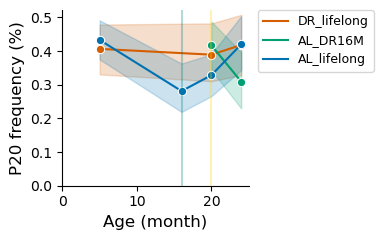

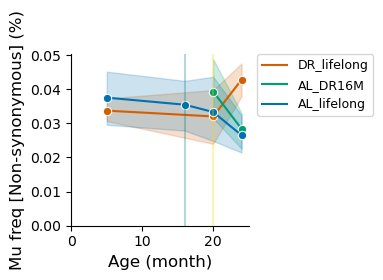

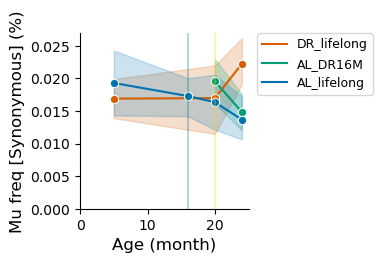

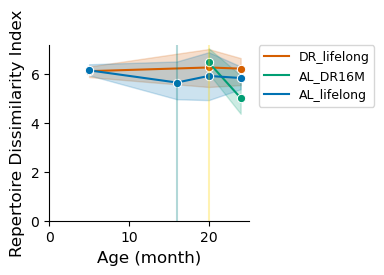

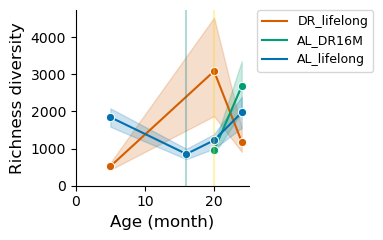

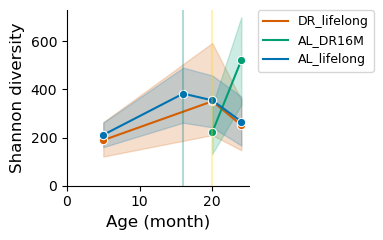

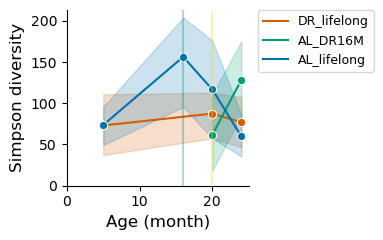

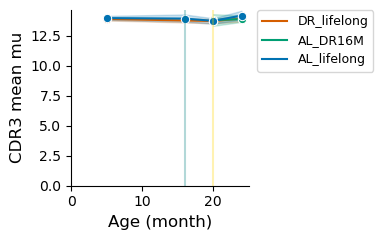

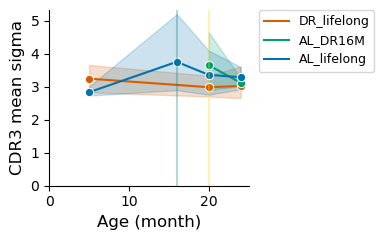

In [9]:
lis_test = ['p20', 'mu_freq_seq_r','mu_freq_seq_s','RDI_uniqueness','Richness', 'Shannon', 'Simpson', "cdr3_mu", "cdr3_sigma"]

dic_test = {'p20':"P20 frequency (%)", 'mu_freq_seq_r':"Mu freq [Non-synonymous] (%)",'mu_freq_seq_s':"Mu freq [Synonymous] (%)",
            'RDI_uniqueness':"Repertoire Dissimilarity Index",'Richness':"Richness diversity", 'Shannon':"Shannon diversity", 'Simpson': "Simpson diversity",
           "cdr3_mu": "CDR3 mean mu", "cdr3_sigma": "CDR3 mean sigma"}

for e in lis_test:

    fig, ax = plt.subplots(figsize = (4,2.5))
    #ax = sns.boxplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax, palette=palette2,
    #            hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], showfliers = False)
    #sns.swarmplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax,
    #            hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], 
    #              dodge = True, palette='dark:.25', size = 3)
    sns.lineplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax, palette=palette2,
                linewidth = 1.5, hue_order = ["DR_lifelong", "AL_DR16M", "AL_lifelong"], marker = "o")

    plt.axvline(x = 16, alpha = 0.3, color = "teal")
    plt.axvline(x = 20, alpha = 0.3, color = "gold")
    ax.tick_params(axis = "x", labelsize=10)
    ax.tick_params(axis = "y", labelsize=10)
    ax.set_xlabel("Age (month)", fontsize = 12)
    ax.set_ylabel(dic_test[e], fontsize = 12)
    plt.ylim(0, None)
    plt.xlim(0, 25)

    leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 9)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for line in leg.get_lines():
        line.set_linewidth(1.5)

    matplotlib.rcParams['pdf.fonttype'] = 42 

    plt.tight_layout()

    if run_type != "dry":

        plt.savefig("{}{}_{}_line_{}.pdf".format(path, organ, e, new_day))

    else:
        plt.show()
    

In [10]:
spl = pd.read_csv("../../analysis/results_tables/RDI_biogroups_{}.tsv".format(organ), sep = " ")
# We remove the ones that the RDI is == 0 because that is comparison of a sample against itself
spl = spl[spl["value"] != 0.0]
# We remove the ones that the RDI is == 0 because that is comparison of a sample against itself
spl = spl.drop_duplicates()
spl = spl[~spl['col'].isin(['value'])]

In [11]:
# Getting the info we need into our dataframe
diets = []
for e in spl["row"].to_list():
    if e[2:] == "R_lifelong":
        diets.append("DR_lifelong")
    elif e[2:] == "L_lifelong":
        diets.append("AL_lifelong")
    else:
        diets.append(e[2:])

ages = []
for e in spl["row"].to_list():
    ages.append(e[:2])
ages = [w.replace('5D', "5") for w in ages]
ages = [w.replace('5A', "5") for w in ages]

ages = [ int(x) for x in ages ]

# Add to dataframe
spl["Age"] = ages
spl["Diet"] = diets

In [12]:
print("AL vs DR")

dfs_small = spl[spl["Diet"].isin(["AL_lifelong", "DR_lifelong"])]
dfs_small = dfs_small[dfs_small["Age"] != 16]

model = ols(f'value ~ Age + Diet + Age*Diet', data=dfs_small).fit()
display(anova_lm(model, typ=2))
    
print("AL vs AL_DR16M")
dfs_small = spl[spl["Diet"].isin(["AL_lifelong", "AL_DR16M"])]
dfs_small = dfs_small[dfs_small["Age"] != 5]
dfs_small = dfs_small[dfs_small["Age"] != 16]

model = ols(f'value ~ Age + Diet + Age*Diet', data=dfs_small).fit()
display(anova_lm(model, typ=2))
    
print("DR vs AL_DR16M")
dfs_small = spl[spl["Diet"].isin(["DR_lifelong", "AL_DR16M"])]
dfs_small = dfs_small[dfs_small["Age"] != 5]
dfs_small = dfs_small[dfs_small["Age"] != 16]

model = ols(f'value ~ Age + Diet + Age*Diet', data=dfs_small).fit()
display(anova_lm(model, typ=2))

AL vs DR


,sum_sq,df,F,PR(>F)
Diet,1.596283,1.0,3.968437,0.051245
Age,0.182640,1.0,0.454051,0.503189
Age:Diet,0.104442,1.0,0.259648,0.612364
Residual,22.525711,56.0,NaN,NaN


AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.101263,1.0,0.124613,0.726143
Age,16.452641,1.0,20.246401,0.000069
Age:Diet,9.857916,1.0,12.131020,0.001320
Residual,29.254338,36.0,NaN,NaN


DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,2.421156,1.0,3.584625,0.066376
Age,17.558227,1.0,25.995705,0.000011
Age:Diet,9.034013,1.0,13.375243,0.000809
Residual,24.315407,36.0,NaN,NaN


In [13]:
## I have to compare 16MAL to 20MAL and 20MAL_DR16M
AL16M = spl[spl["row"] == "16AL_lifelong"]
AL20M = spl[spl["row"] == "20AL_lifelong"]
ALDR16M_20M = spl[spl["row"] == "20AL_DR16M"]

print("RDI")
print(f"AL 16M vs AL 20M")
display(sp.posthoc_mannwhitney(pd.concat([AL16M, AL20M]), val_col = "value", group_col = "Age"))
print(f"AL 16M vs AL_DR16M 20M")
display(sp.posthoc_mannwhitney(pd.concat([AL16M, ALDR16M_20M]), val_col = "value", group_col = "Age"))
print("=============")

RDI
AL 16M vs AL 20M


,16,20
16,1.000000,0.185877
20,0.185877,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.009108
20,0.009108,1.000000


In [14]:
def linreg_ageRDI(df, order, co):
    x = df[df["row"].isin(order)].sort_values(by = ["Age"], ascending = True)["Age"].to_list()
    y = df[df["row"].isin(order)].sort_values(by = ["Age"], ascending = True)[co].to_list()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(co)
    print(f"Slope: {slope}\np-value: {p_value}")

In [15]:
linreg_ageRDI(spl, ["5AL_lifelong", "16AL_lifelong", "20AL_lifelong", "24AL_lifelong"], "value")

value
Slope: 0.002324011567529309
p-value: 0.9057367096125117


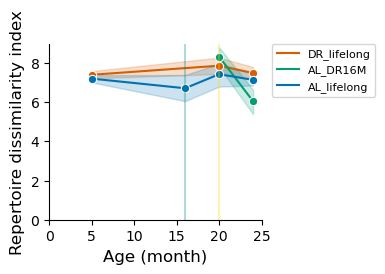

In [16]:
fig, ax = plt.subplots(figsize = (4,2.5))
#ax = sns.boxplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax, palette=palette2,
#    hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], showfliers = False)
#sns.swarmplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax,
#                hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], 
#                  dodge = True, palette='dark:.25', size = 3)

sns.lineplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax, palette=palette2,
                linewidth = 1.5, hue_order = ["DR_lifelong", "AL_DR16M", "AL_lifelong"], marker = "o")

plt.axvline(x = 16, alpha = 0.3, color = "teal")
plt.axvline(x = 20, alpha = 0.3, color = "gold")
ax.tick_params(axis = "x", labelsize=10)
ax.tick_params(axis = "y", labelsize=10)
ax.set_xlabel("Age (month)", fontsize = 12)
ax.set_ylabel("Repertoire dissimilarity index", fontsize = 12)
plt.ylim(0, None)
plt.xlim(0, 25)

leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for line in leg.get_lines():
    line.set_linewidth(1.5)

matplotlib.rcParams['pdf.fonttype'] = 42 

plt.tight_layout()

if run_type != "dry":

    plt.savefig("{}{}_RDI_line_{}.pdf".format(path, organ, new_day))

else:
    plt.show()

In [17]:
df.columns = ['Unnamed: 0', 'Animal_ID', 'biogroup', 'Age', 'Diet', 'p20',
       'mu_freq_seq_r', 'mu_freq_seq_s', 'cdr3_mu', 'cdr3_sigma',
       'Post_antigenic', 'Clone_antigen_exposed', 'Naive', 'RDI_uniqueness',
       'IGHV1', 'IGHV10', 'IGHV11', 'IGHV12', 'IGHV13', 'IGHV14', 'IGHV15',
       'IGHV16', 'IGHV2', 'IGHV3', 'IGHV4', 'IGHV5', 'IGHV6', 'IGHV7', 'IGHV8',
       'IGHV9', 'IGHJ1', 'IGHJ2', 'IGHJ3', 'IGHJ4', 'relAb_IGA', 'relAb_IGD',
       'relAb_IGE', 'relAb_IGG', 'relAb_IGM', 'RDI_uniqueness_IGA',
       'RDI_uniqueness_IGD', 'RDI_uniqueness_IGE', 'RDI_uniqueness_IGM',
       'RDI_uniqueness_IGG', 'p20_IGA', 'p20_IGM', 'p20_IGD', 'p20_IGE',
       'p20_IGG', 'mu_freq_seq_r_IGA', 'mu_freq_seq_s_IGA',
       'mu_freq_seq_r_IGM', 'mu_freq_seq_s_IGM', 'mu_freq_seq_r_IGG',
       'mu_freq_seq_s_IGG', 'mu_freq_seq_r_IGD', 'mu_freq_seq_s_IGD',
       'mu_freq_seq_r_IGE', 'mu_freq_seq_s_IGE', 'cdr3_mu_IGA',
       'cdr3_sigma_IGA', 'cdr3_mu_IGE', 'cdr3_sigma_IGE', 'cdr3_mu_IGD',
       'cdr3_sigma_IGD', 'cdr3_mu_IGG', 'cdr3_sigma_IGG', 'cdr3_mu_IGM',
       'cdr3_sigma_IGM', 'presAbsPatho', 'presAbsTumor', 'Morbidity',
       'Richness', 'Shannon', 'Simpson', 'Richness_IGA', 'Richness_IGE',
       'Richness_IGD', 'Richness_IGM', 'Richness_IGG', 'Shannon_IGA',
       'Shannon_IGE', 'Shannon_IGD', 'Shannon_IGM', 'Shannon_IGG',
       'Simpson_IGA', 'Simpson_IGE', 'Simpson_IGD', 'Simpson_IGM',
       'Simpson_IGG']

# ISOTYPES

In [18]:
df.columns

Index(['Unnamed: 0', 'Animal_ID', 'biogroup', 'Age', 'Diet', 'p20',
       'mu_freq_seq_r', 'mu_freq_seq_s', 'cdr3_mu', 'cdr3_sigma',
       'Post_antigenic', 'Clone_antigen_exposed', 'Naive', 'RDI_uniqueness',
       'IGHV1', 'IGHV10', 'IGHV11', 'IGHV12', 'IGHV13', 'IGHV14', 'IGHV15',
       'IGHV16', 'IGHV2', 'IGHV3', 'IGHV4', 'IGHV5', 'IGHV6', 'IGHV7', 'IGHV8',
       'IGHV9', 'IGHJ1', 'IGHJ2', 'IGHJ3', 'IGHJ4', 'relAb_IGA', 'relAb_IGD',
       'relAb_IGE', 'relAb_IGG', 'relAb_IGM', 'RDI_uniqueness_IGA',
       'RDI_uniqueness_IGD', 'RDI_uniqueness_IGE', 'RDI_uniqueness_IGM',
       'RDI_uniqueness_IGG', 'p20_IGA', 'p20_IGM', 'p20_IGD', 'p20_IGE',
       'p20_IGG', 'mu_freq_seq_r_IGA', 'mu_freq_seq_s_IGA',
       'mu_freq_seq_r_IGM', 'mu_freq_seq_s_IGM', 'mu_freq_seq_r_IGG',
       'mu_freq_seq_s_IGG', 'mu_freq_seq_r_IGD', 'mu_freq_seq_s_IGD',
       'mu_freq_seq_r_IGE', 'mu_freq_seq_s_IGE', 'cdr3_mu_IGA',
       'cdr3_sigma_IGA', 'cdr3_mu_IGE', 'cdr3_sigma_IGE', 'cdr3_mu_IGD',
    

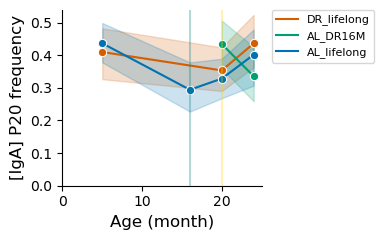

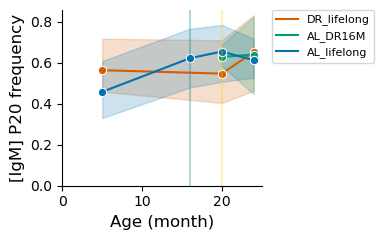

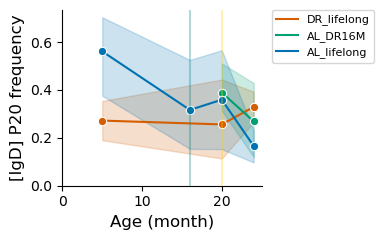

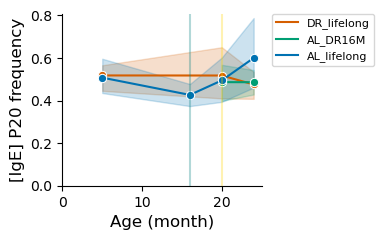

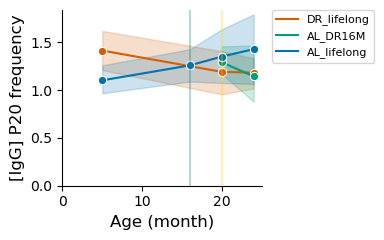

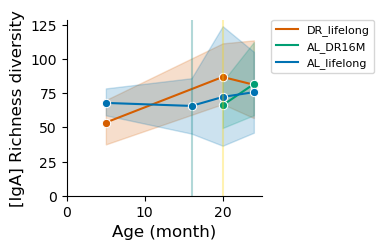

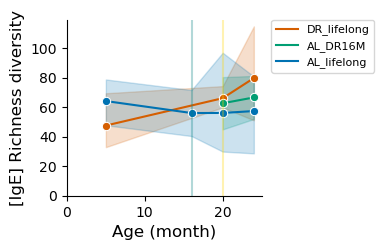

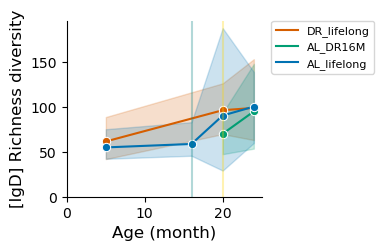

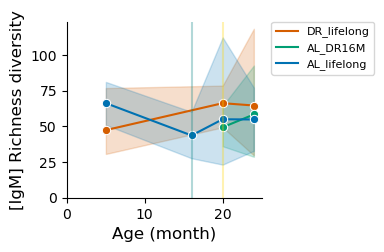

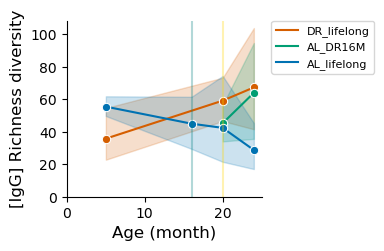

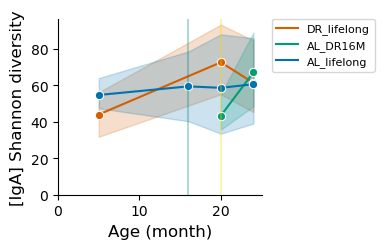

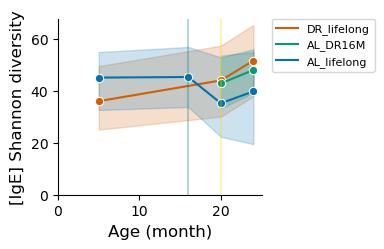

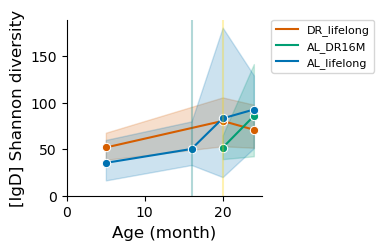

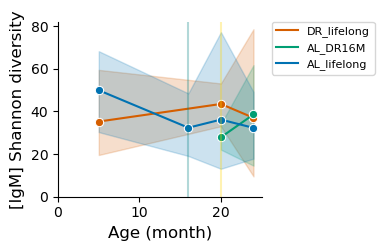

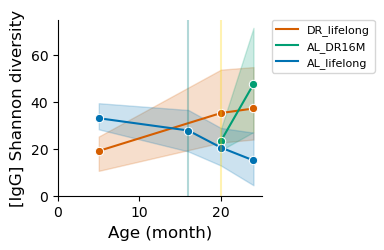

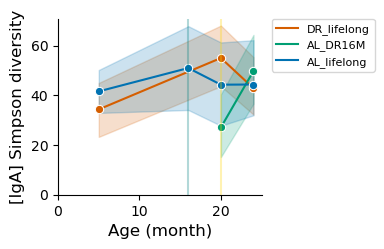

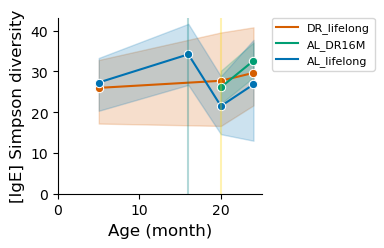

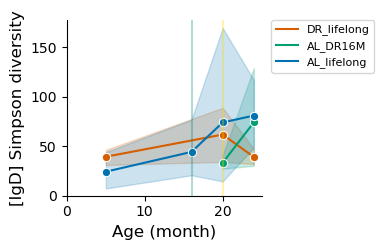

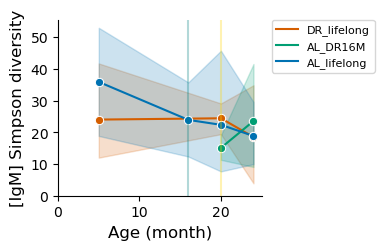

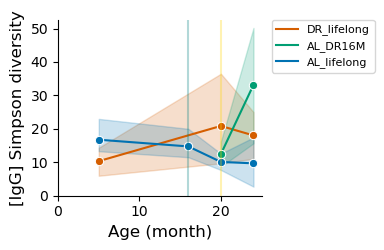

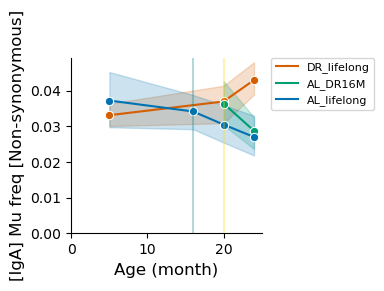

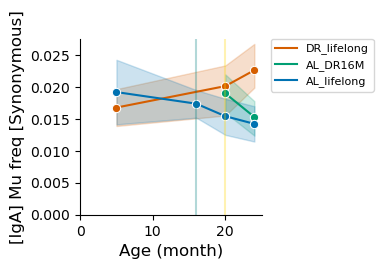

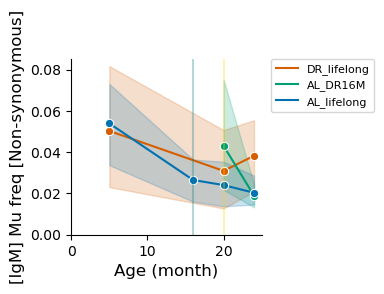

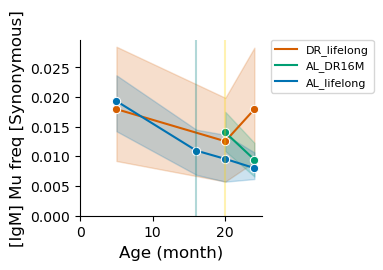

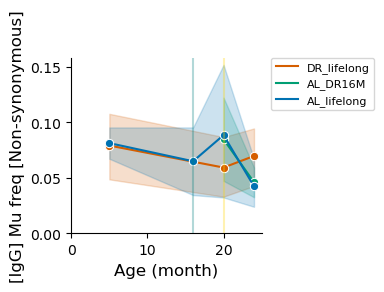

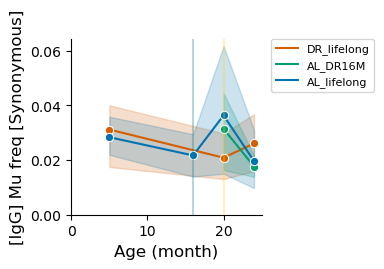

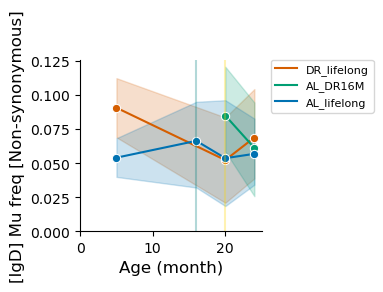

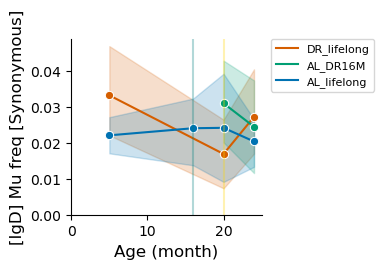

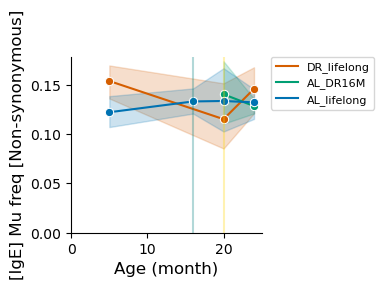

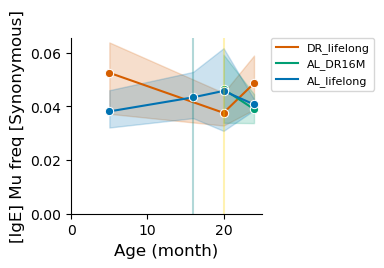

In [19]:
if organ == "SPL":
    lis_iso = ['p20_IGA', 'p20_IGM', 'p20_IGD', 'p20_IGE','p20_IGG', 'Richness_IGA', 'Richness_IGE',
       'Richness_IGD', 'Richness_IGM', 'Richness_IGG', 'Shannon_IGA',
       'Shannon_IGE', 'Shannon_IGD', 'Shannon_IGM', 'Shannon_IGG',
       'Simpson_IGA', 'Simpson_IGE', 'Simpson_IGD', 'Simpson_IGM',
       'Simpson_IGG',  'mu_freq_seq_r_IGA', 'mu_freq_seq_s_IGA',
       'mu_freq_seq_r_IGM', 'mu_freq_seq_s_IGM', 'mu_freq_seq_r_IGG',
       'mu_freq_seq_s_IGG', 'mu_freq_seq_r_IGD', 'mu_freq_seq_s_IGD',
       'mu_freq_seq_r_IGE', 'mu_freq_seq_s_IGE']
    dic_iso = {'p20_IGA':"[IgA] P20 frequency", 'p20_IGM':"[IgM] P20 frequency", 'p20_IGD':"[IgD] P20 frequency", 
           'p20_IGE':"[IgE] P20 frequency",'p20_IGG':"[IgG] P20 frequency", 'Richness_IGA':"[IgA] Richness diversity", 
           'Richness_IGE':"[IgE] Richness diversity", 'Richness_IGD':"[IgD] Richness diversity", 'Richness_IGM':"[IgM] Richness diversity", 
           'Richness_IGG':"[IgG] Richness diversity", 'Shannon_IGA':"[IgA] Shannon diversity",
           'Shannon_IGE':"[IgE] Shannon diversity", 'Shannon_IGD':"[IgD] Shannon diversity", 'Shannon_IGM':"[IgM] Shannon diversity", 
           'Shannon_IGG':"[IgG] Shannon diversity",'Simpson_IGA':"[IgA] Simpson diversity", 'Simpson_IGE':"[IgE] Simpson diversity", 
           'Simpson_IGD':"[IgD] Simpson diversity", 'Simpson_IGM':"[IgM] Simpson diversity", 'Simpson_IGG':"[IgG] Simpson diversity", 
          'mu_freq_seq_r_IGA':"[IgA] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGA':"[IgA] Mu freq [Synonymous]",
       'mu_freq_seq_r_IGM':"[IgM] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGM':"[IgM] Mu freq [Synonymous]", 'mu_freq_seq_r_IGG':"[IgG] Mu freq [Non-synonymous]",
       'mu_freq_seq_s_IGG':"[IgG] Mu freq [Synonymous]", 'mu_freq_seq_r_IGD':"[IgD] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGD':"[IgD] Mu freq [Synonymous]",
       'mu_freq_seq_r_IGE':"[IgE] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGE':"[IgE] Mu freq [Synonymous]"}
elif organ == "ILE":

    lis_iso = ['p20_IGA', 'p20_IGM', 'p20_IGD', 'p20_IGE','p20_IGG', 'Richness_IGA', 'Richness_IGE',
       'Richness_IGD', 'Richness_IGM', 'Richness_IGG', 'Shannon_IGA',
       'Shannon_IGE', 'Shannon_IGD', 'Shannon_IGM', 'Shannon_IGG',
       'Simpson_IGA', 'Simpson_IGE', 'Simpson_IGD', 'Simpson_IGM',
       'Simpson_IGG',  'mu_freq_seq_r_IGA', 'mu_freq_seq_s_IGA',
       'mu_freq_seq_r_IGM', 'mu_freq_seq_s_IGM', 'mu_freq_seq_r_IGG',
       'mu_freq_seq_s_IGG', 'mu_freq_seq_r_IGD', 'mu_freq_seq_s_IGD',
       'mu_freq_seq_r_IGE', 'mu_freq_seq_s_IGE']
    
    dic_iso = {'p20_IGA':"[IgA] P20 frequency", 'p20_IGM':"[IgM] P20 frequency", 'p20_IGD':"[IgD] P20 frequency", 
           'p20_IGE':"[IgE] P20 frequency",'p20_IGG':"[IgG] P20 frequency", 'Richness_IGA':"[IgA] Richness diversity", 
           'Richness_IGE':"[IgE] Richness diversity", 'Richness_IGD':"[IgD] Richness diversity", 'Richness_IGM':"[IgM] Richness diversity", 
           'Richness_IGG':"[IgG] Richness diversity", 'Shannon_IGA':"[IgA] Shannon diversity",
           'Shannon_IGE':"[IgE] Shannon diversity", 'Shannon_IGD':"[IgD] Shannon diversity", 'Shannon_IGM':"[IgM] Shannon diversity", 
           'Shannon_IGG':"[IgG] Shannon diversity",'Simpson_IGA':"[IgA] Simpson diversity", 'Simpson_IGE':"[IgE] Simpson diversity", 
           'Simpson_IGD':"[IgD] Simpson diversity", 'Simpson_IGM':"[IgM] Simpson diversity", 'Simpson_IGG':"[IgG] Simpson diversity", 
          'mu_freq_seq_r_IGA':"[IgA] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGA':"[IgA] Mu freq [Synonymous]",
       'mu_freq_seq_r_IGM':"[IgM] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGM':"[IgM] Mu freq [Synonymous]", 'mu_freq_seq_r_IGG':"[IgG] Mu freq [Non-synonymous]",
       'mu_freq_seq_s_IGG':"[IgG] Mu freq [Synonymous]", 'mu_freq_seq_r_IGD':"[IgD] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGD':"[IgD] Mu freq [Synonymous]",
       'mu_freq_seq_r_IGE':"[IgE] Mu freq [Non-synonymous]", 'mu_freq_seq_s_IGE':"[IgE] Mu freq [Synonymous]"}

else:
    print("caca")


for e in lis_iso:
    
    df = df[df["Diet"] != "AL_DR20M"]

    fig, ax = plt.subplots(figsize = (4,2.5))
    #ax = sns.boxplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax, palette=palette2,
    #            hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], showfliers = False)
    #sns.swarmplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax,
    #            hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], 
    #              dodge = True, palette='dark:.25', size = 3)
    sns.lineplot(data = df, x = "Age", y = e, hue = "Diet", ax=ax, palette=palette2,
                linewidth = 1.5, hue_order = ["DR_lifelong", "AL_DR16M", "AL_lifelong"], marker = "o")


    plt.axvline(x = 16, alpha = 0.3, color = "teal")
    plt.axvline(x = 20, alpha = 0.3, color = "gold")
    ax.tick_params(axis = "x", labelsize=10)
    ax.tick_params(axis = "y", labelsize=10)
    ax.set_xlabel("Age (month)", fontsize = 12)
    ax.set_ylabel(dic_iso[e], fontsize = 12)
    plt.ylim(0, None)
    plt.xlim(0, 25)

    leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for line in leg.get_lines():
        line.set_linewidth(1.5)

    matplotlib.rcParams['pdf.fonttype'] = 42 

    plt.tight_layout()

    if run_type != "dry":

        plt.savefig("{}{}_{}_line_{}.pdf".format(path, organ, e, new_day))

    else:
        plt.show()

In [20]:
for e in lis_iso:
    
    #df = df[df["Age"] != 16]
    print(f"\n\n === {e} ===")
    
    print("Anova AL vs DR")
    dfs_small = df[df["Diet"].isin(["AL_lifelong", "DR_lifelong"])]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))
    
    print("Anova AL vs AL_DR16M")
    dfs_small = df[df["Diet"].isin(["AL_lifelong", "AL_DR16M"])]
    dfs_small = dfs_small[dfs_small["Age"] != 5]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))
    
    print("Anova DR vs AL_DR16M")
    dfs_small = df[df["Diet"].isin(["DR_lifelong", "AL_DR16M"])]
    dfs_small = dfs_small[dfs_small["Age"] != 5]
    dfs_small = dfs_small[dfs_small["Age"] != 16]

    model = ols(f'{e} ~ Age + Diet + Age*Diet', data=dfs_small).fit()
    display(anova_lm(model, typ=2))



 === p20_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000977,1.0,0.103237,0.750650
Age,0.005579,1.0,0.589692,0.449731
Age:Diet,0.005459,1.0,0.577086,0.454561
Residual,0.236507,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.002000,1.0,0.210618,0.652456
Age,0.000802,1.0,0.084501,0.775022
Age:Diet,0.036891,1.0,3.884560,0.066285
Residual,0.151950,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000481,1.0,0.050166,0.825609
Age,0.000312,1.0,0.032568,0.859052
Age:Diet,0.041101,1.0,4.289128,0.054889
Residual,0.153321,16.0,NaN,NaN




 === p20_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000546,1.0,0.016893,0.897629
Age,0.081062,1.0,2.505942,0.125988
Age:Diet,0.018240,1.0,0.563875,0.459713
Residual,0.808695,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000002,1.0,0.000078,0.993057
Age,0.001134,1.0,0.041428,0.841280
Age:Diet,0.003598,1.0,0.131498,0.721629
Residual,0.437836,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.006068,1.0,0.150741,0.702946
Age,0.016982,1.0,0.421873,0.525219
Age:Diet,0.010816,1.0,0.268686,0.611308
Residual,0.644065,16.0,NaN,NaN




 === p20_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.033513,1.0,1.123418,0.299317
Age,0.156708,1.0,5.253054,0.030602
Age:Diet,0.200555,1.0,6.722875,0.015679
Residual,0.745793,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.021978,1.0,0.659136,0.428779
Age,0.122670,1.0,3.678888,0.073132
Age:Diet,0.006686,1.0,0.200502,0.660319
Residual,0.533509,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.006661,1.0,0.255453,0.620152
Age,0.002761,1.0,0.105892,0.749087
Age:Diet,0.046626,1.0,1.788053,0.199865
Residual,0.417219,16.0,NaN,NaN




 === p20_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.007471,1.0,0.399150,0.533264
Age,0.001809,1.0,0.096654,0.758460
Age:Diet,0.011495,1.0,0.614144,0.440594
Residual,0.467935,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.018557,1.0,0.872961,0.364024
Age,0.013726,1.0,0.645707,0.433428
Age:Diet,0.013975,1.0,0.657435,0.429363
Residual,0.340118,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000524,1.0,0.044851,0.834953
Age,0.002266,1.0,0.193984,0.665513
Age:Diet,0.002166,1.0,0.185448,0.672477
Residual,0.186919,16.0,NaN,NaN




 === p20_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.014363,1.0,0.158954,0.693506
Age,0.018938,1.0,0.209584,0.651048
Age:Diet,0.415124,1.0,4.594101,0.042001
Residual,2.259004,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.147809,1.0,1.121199,0.305385
Age,0.006164,1.0,0.046758,0.831536
Age:Diet,0.064017,1.0,0.485598,0.495898
Residual,2.109296,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.004792,1.0,0.065124,0.801825
Age,0.030816,1.0,0.418771,0.526727
Age:Diet,0.024331,1.0,0.330642,0.573279
Residual,1.177384,16.0,NaN,NaN




 === Richness_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,48.071886,1.0,0.038790,0.845457
Age,1747.355666,1.0,1.409975,0.246221
Age:Diet,745.785691,1.0,0.601789,0.445173
Residual,30982.027652,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.012751,1.0,0.000008,0.997803
Age,452.343161,1.0,0.277407,0.605632
Age:Diet,178.652531,1.0,0.109562,0.744939
Residual,26089.802620,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,509.898511,1.0,0.487725,0.494970
Age,120.221561,1.0,0.114994,0.738939
Age:Diet,560.264051,1.0,0.535901,0.474724
Residual,16727.398450,16.0,NaN,NaN




 === Richness_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,263.251839,1.0,0.301366,0.587897
Age,492.685778,1.0,0.564018,0.459657
Age:Diet,1831.595117,1.0,2.096779,0.160036
Residual,21838.202822,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,311.418320,1.0,0.307511,0.586880
Age,34.348205,1.0,0.033917,0.856197
Age:Diet,8.764880,1.0,0.008655,0.927033
Residual,16203.315790,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,342.254011,1.0,0.535809,0.474761
Age,386.276551,1.0,0.604727,0.448127
Age:Diet,117.345901,1.0,0.183709,0.673920
Residual,10220.181650,16.0,NaN,NaN




 === Richness_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,94.665945,1.0,0.029490,0.865035
Age,9313.497356,1.0,2.901308,0.100910
Age:Diet,51.440371,1.0,0.016025,0.900279
Residual,80252.562639,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,826.447961,1.0,0.176648,0.679860
Age,1520.157661,1.0,0.324923,0.576581
Age:Diet,281.137511,1.0,0.060091,0.809468
Residual,74856.172510,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1138.766861,1.0,0.481179,0.497836
Age,945.243751,1.0,0.399407,0.536322
Age:Diet,625.577051,1.0,0.264334,0.614186
Residual,37865.848880,16.0,NaN,NaN




 === Richness_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,16.031460,1.0,0.009966,0.921276
Age,25.106672,1.0,0.015608,0.901578
Age:Diet,1249.950335,1.0,0.777033,0.386447
Residual,40215.466080,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,5.559851,1.0,0.003191,0.955655
Age,97.262551,1.0,0.055815,0.816235
Age:Diet,103.808461,1.0,0.059572,0.810276
Residual,27881.292460,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,672.568020,1.0,0.446225,0.513654
Age,67.344500,1.0,0.044681,0.835261
Age:Diet,140.291045,1.0,0.093078,0.764233
Residual,24115.820280,16.0,NaN,NaN




 === Richness_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,1241.412680,1.0,1.956277,0.174196
Age,12.422328,1.0,0.019576,0.889850
Age:Diet,3889.562331,1.0,6.129358,0.020423
Residual,15864.476366,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1811.08512,1.0,2.178280,0.159379
Age,31.70162,1.0,0.038129,0.847642
Age:Diet,1305.72800,1.0,1.570463,0.228145
Residual,13302.86273,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,370.918845,1.0,0.425655,0.523392
Age,899.945280,1.0,1.032749,0.324636
Age:Diet,138.443220,1.0,0.158873,0.695465
Residual,13942.525350,16.0,NaN,NaN




 === Shannon_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,24.974178,1.0,0.038297,0.846429
Age,907.632437,1.0,1.391831,0.249201
Age:Diet,345.328638,1.0,0.529552,0.473556
Residual,16302.854269,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,94.504023,1.0,0.116534,0.737267
Age,827.529702,1.0,1.020436,0.327449
Age:Diet,592.523147,1.0,0.730647,0.405291
Residual,12975.316978,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,684.671535,1.0,1.247891,0.280450
Age,193.345509,1.0,0.352394,0.561060
Age:Diet,1536.933290,1.0,2.801234,0.113626
Residual,8778.606022,16.0,NaN,NaN




 === Shannon_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,134.509804,1.0,0.447347,0.509727
Age,37.962029,1.0,0.126253,0.725330
Age:Diet,598.840290,1.0,1.991599,0.170498
Residual,7517.080564,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,316.246597,1.0,1.086752,0.312688
Age,119.067190,1.0,0.409163,0.531447
Age:Diet,0.392520,1.0,0.001349,0.971157
Residual,4656.024296,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,28.541817,1.0,0.136690,0.716442
Age,205.187823,1.0,0.982670,0.336296
Age:Diet,7.762203,1.0,0.037174,0.849537
Residual,3340.902316,16.0,NaN,NaN




 === Shannon_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,79.035576,1.0,0.028855,0.866481
Age,9161.618752,1.0,3.344820,0.079372
Age:Diet,1570.867380,1.0,0.573509,0.455947
Residual,68476.170933,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1851.120377,1.0,0.412317,0.529889
Age,2370.980741,1.0,0.528110,0.477901
Age:Diet,748.194659,1.0,0.166652,0.688516
Residual,71832.952899,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,244.827205,1.0,0.150460,0.703208
Age,755.047658,1.0,0.464019,0.505492
Age:Diet,2358.824799,1.0,1.449629,0.246098
Residual,26035.078850,16.0,NaN,NaN




 === Shannon_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.717289,1.0,0.000774,0.97803
Age,301.209313,1.0,0.324891,0.57377
Age:Diet,594.335211,1.0,0.641063,0.43087
Residual,23177.707382,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,5.039172,1.0,0.005820,0.940133
Age,58.237340,1.0,0.067265,0.798669
Age:Diet,264.864689,1.0,0.305922,0.587839
Residual,13852.661576,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,246.821047,1.0,0.300367,0.591218
Age,22.090672,1.0,0.026883,0.871816
Age:Diet,368.867817,1.0,0.448891,0.512417
Residual,13147.714973,16.0,NaN,NaN




 === Shannon_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,517.459345,1.0,2.685137,0.113814
Age,2.454623,1.0,0.012737,0.911043
Age:Diet,1670.761706,1.0,8.669714,0.006898
Residual,4817.810957,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1552.020006,1.0,4.918592,0.041392
Age,437.857097,1.0,1.387637,0.256029
Age:Diet,1099.938721,1.0,3.485876,0.080327
Residual,5048.664386,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,3.011673,1.0,0.006912,0.934773
Age,853.669022,1.0,1.959221,0.180687
Age:Diet,618.653409,1.0,1.419846,0.250804
Residual,6971.496390,16.0,NaN,NaN




 === Simpson_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,7.688927,1.0,0.026862,0.871131
Age,295.235507,1.0,1.031422,0.319553
Age:Diet,127.207156,1.0,0.444406,0.511110
Residual,7156.027861,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,172.784444,1.0,0.481013,0.497910
Age,648.365686,1.0,1.804978,0.197857
Age:Diet,639.818316,1.0,1.781184,0.200687
Residual,5747.354405,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,550.305419,1.0,2.077478,0.168772
Age,138.603390,1.0,0.523247,0.479902
Age:Diet,1519.803867,1.0,5.737468,0.029191
Residual,4238.257011,16.0,NaN,NaN




 === Simpson_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,52.360544,1.0,0.389581,0.538174
Age,0.389837,1.0,0.002901,0.957478
Age:Diet,41.309626,1.0,0.307358,0.584232
Residual,3360.052997,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,135.998445,1.0,1.396870,0.254517
Age,173.768717,1.0,1.784817,0.200251
Age:Diet,1.759070,1.0,0.018068,0.894750
Residual,1557.750554,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,2.416468,1.0,0.022949,0.881483
Age,88.838778,1.0,0.843700,0.371981
Age:Diet,25.836922,1.0,0.245373,0.627086
Residual,1684.747046,16.0,NaN,NaN




 === Simpson_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,1397.877061,1.0,0.592211,0.448776
Age,6148.493582,1.0,2.604811,0.119093
Age:Diet,3419.092110,1.0,1.448499,0.240042
Residual,59010.943006,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,2817.824619,1.0,0.689803,0.418453
Age,2839.874444,1.0,0.695201,0.416676
Age:Diet,1421.708112,1.0,0.348034,0.563468
Residual,65359.528195,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,53.172360,1.0,0.040772,0.842523
Age,408.216403,1.0,0.313017,0.583582
Age:Diet,5011.457886,1.0,3.842751,0.067613
Residual,20866.126922,16.0,NaN,NaN




 === Simpson_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,66.763171,1.0,0.200235,0.658385
Age,628.985459,1.0,1.886442,0.181797
Age:Diet,219.272606,1.0,0.657638,0.425048
Residual,8335.607766,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,8.355440,1.0,0.025494,0.875141
Age,30.468234,1.0,0.092964,0.764372
Age:Diet,179.100238,1.0,0.546468,0.470472
Residual,5243.864239,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,23.099832,1.0,0.093342,0.763910
Age,8.021348,1.0,0.032413,0.859385
Age:Diet,258.259010,1.0,1.043572,0.322191
Residual,3959.614423,16.0,NaN,NaN




 === Simpson_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,156.703498,1.0,1.678551,0.206953
Age,0.249924,1.0,0.002677,0.959147
Age:Diet,351.469430,1.0,3.764814,0.063700
Residual,2333.909678,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,833.648200,1.0,5.493214,0.032332
Age,514.075391,1.0,3.387431,0.084318
Age:Diet,557.502203,1.0,3.673587,0.073319
Residual,2428.154331,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,56.378310,1.0,0.248853,0.624673
Age,399.004354,1.0,1.761196,0.203103
Age:Diet,692.196206,1.0,3.055339,0.099631
Residual,3624.848093,16.0,NaN,NaN




 === mu_freq_seq_r_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000305,1.0,6.051801,0.021152
Age,0.000008,1.0,0.158167,0.694225
Age:Diet,0.000436,1.0,8.640961,0.006979
Residual,0.001261,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000073,1.0,1.563768,0.229094
Age,0.000156,1.0,3.325063,0.086968
Age:Diet,0.000022,1.0,0.462309,0.506266
Residual,0.000749,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000275,1.0,5.959500,0.026637
Age,0.000003,1.0,0.072221,0.791564
Age:Diet,0.000234,1.0,5.083906,0.038514
Residual,0.000737,16.0,NaN,NaN




 === mu_freq_seq_s_IGA ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,1.041194e-04,1.0,5.092057,0.033028
Age,6.851272e-08,1.0,0.003351,0.954300
Age:Diet,1.391523e-04,1.0,6.805370,0.015122
Residual,5.111856e-04,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000027,1.0,1.946408,0.182040
Age,0.000030,1.0,2.158859,0.161138
Age:Diet,0.000008,1.0,0.560844,0.464788
Residual,0.000222,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000090,1.0,4.972222,0.040432
Age,0.000002,1.0,0.099893,0.756043
Age:Diet,0.000048,1.0,2.648115,0.123202
Residual,0.000290,16.0,NaN,NaN




 === mu_freq_seq_r_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000395,1.0,0.848786,0.365702
Age,0.003410,1.0,7.328852,0.012056
Age:Diet,0.000497,1.0,1.067948,0.311303
Residual,0.011633,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000389,1.0,0.966830,0.340108
Age,0.000971,1.0,2.409869,0.140127
Age:Diet,0.000521,1.0,1.293286,0.272188
Residual,0.006444,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000064,1.0,0.106719,0.748145
Age,0.000355,1.0,0.592643,0.452616
Age:Diet,0.001234,1.0,2.060280,0.170443
Residual,0.009585,16.0,NaN,NaN




 === mu_freq_seq_s_IGM ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000117,1.0,1.675391,0.207367
Age,0.000255,1.0,3.661013,0.067218
Age:Diet,0.000125,1.0,1.801400,0.191606
Residual,0.001739,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000043,1.0,2.513680,0.132426
Age,0.000047,1.0,2.726045,0.118212
Age:Diet,0.000012,1.0,0.668130,0.425709
Residual,0.000276,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,6.130754e-05,1.0,0.881336,0.361793
Age,8.126746e-07,1.0,0.011683,0.915271
Age:Diet,1.244350e-04,1.0,1.788835,0.199771
Residual,1.112993e-03,16.0,NaN,NaN




 === mu_freq_seq_r_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000010,1.0,0.005681,0.940519
Age,0.002068,1.0,1.129030,0.298139
Age:Diet,0.000201,1.0,0.109599,0.743360
Residual,0.045799,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,1.123500e-11,1.0,4.887033e-09,0.999945
Age,8.992205e-03,1.0,3.911454e+00,0.065446
Age:Diet,6.957176e-05,1.0,3.026252e-02,0.864078
Residual,3.678307e-02,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000004,1.0,0.003497,0.953578
Age,0.000999,1.0,0.799630,0.384458
Age:Diet,0.003012,1.0,2.411777,0.139980
Residual,0.019984,16.0,NaN,NaN




 === mu_freq_seq_s_IGG ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000036,1.0,0.126337,0.725242
Age,0.000139,1.0,0.489371,0.490667
Age:Diet,0.000016,1.0,0.056217,0.814510
Residual,0.007088,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000060,1.0,0.166025,0.689069
Age,0.001165,1.0,3.245851,0.090477
Age:Diet,0.000010,1.0,0.028276,0.868568
Residual,0.005744,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000006,1.0,0.036507,0.850876
Age,0.000093,1.0,0.589892,0.453648
Age:Diet,0.000453,1.0,2.867048,0.109786
Residual,0.002530,16.0,NaN,NaN




 === mu_freq_seq_r_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.001587,1.0,1.277759,0.269045
Age,0.000766,1.0,0.616323,0.439794
Age:Diet,0.001190,1.0,0.957845,0.337107
Residual,0.031054,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.001581,1.0,0.922267,0.351170
Age,0.000526,1.0,0.306958,0.587214
Age:Diet,0.000907,1.0,0.529279,0.477422
Residual,0.027422,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000780,1.0,0.464048,0.505479
Age,0.000065,1.0,0.038517,0.846879
Age:Diet,0.002026,1.0,1.205639,0.288447
Residual,0.026886,16.0,NaN,NaN




 === mu_freq_seq_s_IGD ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000076,1.0,0.389514,0.538209
Age,0.000116,1.0,0.593296,0.448365
Age:Diet,0.000106,1.0,0.546672,0.466567
Residual,0.004870,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000149,1.0,0.580290,0.457281
Age,0.000133,1.0,0.518337,0.481938
Age:Diet,0.000009,1.0,0.036185,0.851527
Residual,0.004103,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000160,1.0,0.739008,0.402676
Age,0.000018,1.0,0.083598,0.776192
Age:Diet,0.000355,1.0,1.635263,0.219214
Residual,0.003470,16.0,NaN,NaN




 === mu_freq_seq_r_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000459,1.0,0.456561,0.505438
Age,0.000029,1.0,0.028775,0.866666
Age:Diet,0.001112,1.0,1.106091,0.302993
Residual,0.025144,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000012,1.0,0.012883,0.911044
Age,0.000224,1.0,0.249138,0.624476
Age:Diet,0.000141,1.0,0.156613,0.697521
Residual,0.014414,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000076,1.0,0.069661,0.795200
Age,0.000441,1.0,0.403358,0.534338
Age:Diet,0.002290,1.0,2.095385,0.167055
Residual,0.017488,16.0,NaN,NaN




 === mu_freq_seq_s_IGE ===
Anova AL vs DR


,sum_sq,df,F,PR(>F)
Diet,0.000133,1.0,0.817546,0.374530
Age,0.000006,1.0,0.037867,0.847284
Age:Diet,0.000191,1.0,1.177114,0.288296
Residual,0.004063,25.0,NaN,NaN


Anova AL vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,0.000002,1.0,0.008542,0.927511
Age,0.000194,1.0,1.051613,0.320391
Age:Diet,0.000007,1.0,0.039951,0.844094
Residual,0.002947,16.0,NaN,NaN


Anova DR vs AL_DR16M


,sum_sq,df,F,PR(>F)
Diet,8.016033e-07,1.0,0.005364,0.942521
Age,1.584077e-05,1.0,0.106009,0.748954
Age:Diet,4.247840e-04,1.0,2.842714,0.111188
Residual,2.390864e-03,16.0,NaN,NaN


In [21]:
df.head()

,Unnamed: 0,Animal_ID,biogroup,Age,Diet,p20,mu_freq_seq_r,mu_freq_seq_s,cdr3_mu,cdr3_sigma,...,Shannon_IGA,Shannon_IGE,Shannon_IGD,Shannon_IGM,Shannon_IGG,Simpson_IGA,Simpson_IGE,Simpson_IGD,Simpson_IGM,Simpson_IGG
0,0,SGRO-1248,5M DR_lifelong,5,DR_lifelong,0.497829,0.034500,0.019129,13.930652,2.755659,...,27.137670,34.677366,33.737912,27.517356,20.196567,18.560485,28.881134,27.657048,18.771305,14.388765
1,1,SGRO-0984,5M DR_lifelong,5,DR_lifelong,0.287628,0.029540,0.013957,14.100310,3.425631,...,54.850185,32.409441,54.463373,16.910937,6.563541,49.277514,24.845729,48.157732,9.751368,3.190890
2,2,SGRO-1272,5M DR_lifelong,5,DR_lifelong,0.380781,0.031797,0.013811,13.762868,3.906043,...,36.439901,21.895042,43.427390,25.861678,22.632561,32.092331,14.663094,40.966744,17.814254,14.321337
3,3,SGRO-0961,5M AL_lifelong,5,AL_lifelong,0.496508,0.047992,0.025557,13.940362,2.773331,...,46.056545,41.401507,83.524645,80.236151,45.669462,26.844975,21.203662,65.528522,63.095663,29.157880
4,4,SGRO-1108,5M AL_lifelong,5,AL_lifelong,0.532657,0.048759,0.026848,13.904222,3.160778,...,49.204371,49.867953,13.978549,13.636518,33.028638,35.851002,33.018744,5.890733,5.901351,13.812122


In [22]:
## Now we need to the age slope of AL

for e in lis_iso:
    
    linreg_age(df, ["5M AL_lifelong", "16M AL_lifelong", "20M_AL lifelong", "24M AL_lifelong"], e)
    print("\n")

p20_IGA
Slope: -0.0025132447758875204
p-value: 0.5002346761032211


p20_IGM
Slope: 0.008536612426035513
p-value: 0.14094307711943377


p20_IGD
Slope: -0.020876923076923078
p-value: 0.003964504488323757


p20_IGE
Slope: 0.0041168305378831834
p-value: 0.43753995201793683


p20_IGG
Slope: 0.017019656324068086
p-value: 0.12414229471657673


Richness_IGA
Slope: 0.3772362637362637
p-value: 0.6864987874474271


Richness_IGE
Slope: -0.379412087912088
p-value: 0.6460188345831804


Richness_IGD
Slope: 2.2695714285714286
p-value: 0.08120507326026007


Richness_IGM
Slope: -0.69039010989011
p-value: 0.40103194844298673


Richness_IGG
Slope: -1.3777307692307692
p-value: 0.02590775807338496


Shannon_IGA
Slope: 0.3182073198231366
p-value: 0.6829766662090015


Shannon_IGE
Slope: -0.26071044374017893
p-value: 0.653829944913142


Shannon_IGD
Slope: 2.9189680437457133
p-value: 0.032138931151492404


Shannon_IGM
Slope: -0.9684875611346889
p-value: 0.17524634223374533


Shannon_IGG
Slope: -0.91701003997102

In [23]:
## I have to compare 16MAL to 20MAL and 20MAL_DR16M
AL16M = df[df["biogroup"] == "16M AL_lifelong"]
AL20M = df[df["biogroup"] == "20M AL_lifelong"]
ALDR16M_20M = df[df["biogroup"] == "20M AL_DR16M"]

for e in lis_iso:
    print(e)
    print(f"AL 16M vs AL 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, AL20M]), val_col = e, group_col = "Age"))
    print(f"AL 16M vs AL_DR16M 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, ALDR16M_20M]), val_col = e, group_col = "Age"))
    print("=============")

p20_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.055556
20,0.055556,1.000000


p20_IGM
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


p20_IGD
AL 16M vs AL 20M


,16,20
16,1.0,1.0
20,1.0,1.0


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


p20_IGE
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


p20_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


Richness_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


Richness_IGE
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


Richness_IGD
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


Richness_IGM
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


Richness_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


Shannon_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.309524
20,0.309524,1.000000


Shannon_IGE
AL 16M vs AL 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


Shannon_IGD
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


Shannon_IGM
AL 16M vs AL 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


Shannon_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.309524
20,0.309524,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


Simpson_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.095238
20,0.095238,1.000000


Simpson_IGE
AL 16M vs AL 20M


,16,20
16,1.000000,0.095238
20,0.095238,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.309524
20,0.309524,1.000000


Simpson_IGD
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


Simpson_IGM
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


Simpson_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.095238
20,0.095238,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


mu_freq_seq_r_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


mu_freq_seq_s_IGA
AL 16M vs AL 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


mu_freq_seq_r_IGM
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


mu_freq_seq_s_IGM
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.420635
20,0.420635,1.000000


mu_freq_seq_r_IGG
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.547619
20,0.547619,1.000000


mu_freq_seq_s_IGG
AL 16M vs AL 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.309524
20,0.309524,1.000000


mu_freq_seq_r_IGD
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


mu_freq_seq_s_IGD
AL 16M vs AL 20M


,16,20
16,1.0,1.0
20,1.0,1.0


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.690476
20,0.690476,1.000000


mu_freq_seq_r_IGE
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


mu_freq_seq_s_IGE
AL 16M vs AL 20M


,16,20
16,1.00000,0.84127
20,0.84127,1.00000


AL 16M vs AL_DR16M 20M


,16,20
16,1.0,1.0
20,1.0,1.0


In [24]:
igA = pd.read_csv("../../analysis/results_tables/RDI_IGA_biogroup_{}_isosum.tsv".format(organ), sep = " ")
igD = pd.read_csv("../../analysis/results_tables/RDI_IGD_biogroup_{}_isosum.tsv".format(organ), sep = " ")
igE = pd.read_csv("../../analysis/results_tables/RDI_IGE_biogroup_{}_isosum.tsv".format(organ), sep = " ")
igG = pd.read_csv("../../analysis/results_tables/RDI_IGG_biogroup_{}_isosum.tsv".format(organ), sep = " ")
igM = pd.read_csv("../../analysis/results_tables/RDI_IGM_biogroup_{}_isosum.tsv".format(organ), sep = " ")

listup = [(igA, "IgA"), (igD, "IgD"), (igE, "IgE"), (igG, "IgG"), (igM, "IgM")]

In [25]:
listup2 = []
for d, i in listup:
    d = pd.DataFrame(d)
    # We remove the ones that the RDI is == 0 because that is comparison of a sample against itself
    d = d[d["value"] != 0.0]
    # We remove the ones that the RDI is == 0 because that is comparison of a sample against itself
    d = d.drop_duplicates()
    d = d[~d['col'].isin(['value'])]
    listup2.append((d, i))

In [26]:
listup3 = []
for d, i in listup2:
    # Getting the info we need into our dataframe
    d = pd.DataFrame(d)
    diets = []
    for e in d["row"].to_list():
        if e[2:] == "R_lifelong":
            diets.append("DR_lifelong")
        elif e[2:] == "L_lifelong":
            diets.append("AL_lifelong")
        else:
            diets.append(e[2:])

    ages = []
    for e in d["row"].to_list():
        ages.append(e[:2])
    ages = [w.replace('5D', "5") for w in ages]
    ages = [w.replace('5A', "5") for w in ages]

    ages = [ int(x) for x in ages ]

    # Add to dataframe
    d["Age"] = ages
    d["Diet"] = diets
    listup3.append((d, i))

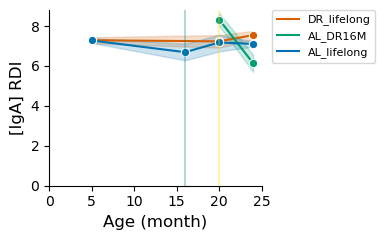

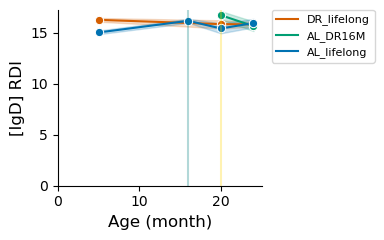

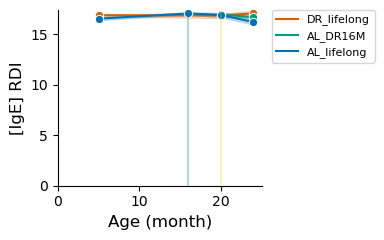

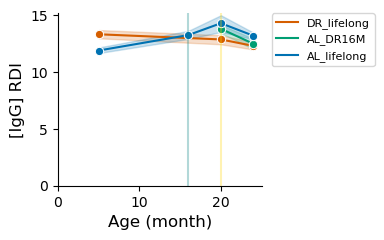

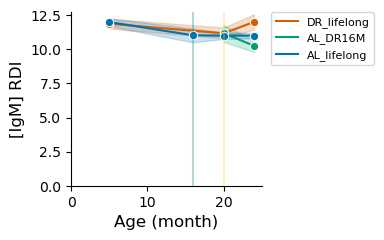

In [27]:
for d, i in listup3:
    spl = pd.DataFrame(d)

    #splsub = spl[spl["Age"] != 16]


    fig, ax = plt.subplots(figsize = (4,2.5))
    #ax = sns.boxplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax, palette=palette2,
    #    hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], showfliers = False)
    #sns.swarmplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax,
    #            hue_order = ["DR_lifelong", "AL_lifelong", "AL_DR16M"], 
    #              dodge = True, palette='dark:.25', size = 3)
    sns.lineplot(data = spl, x = "Age", y = "value", hue = "Diet", ax=ax, palette=palette2,
                linewidth = 1.5, hue_order = ["DR_lifelong", "AL_DR16M", "AL_lifelong"], marker = "o")

    plt.axvline(x = 16, alpha = 0.3, color = "teal")
    plt.axvline(x = 20, alpha = 0.3, color = "gold")
    ax.tick_params(axis = "x", labelsize=10)
    ax.tick_params(axis = "y", labelsize=10)
    ax.set_xlabel("Age (month)", fontsize = 12)
    ax.set_ylabel("[{}] RDI".format(i), fontsize = 12)
    plt.ylim(0, None)
    plt.xlim(0, 25)

    leg = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 8)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    for line in leg.get_lines():
        line.set_linewidth(1.5)

    matplotlib.rcParams['pdf.fonttype'] = 42 

    plt.tight_layout()

    if run_type != "dry":

        plt.savefig("{}{}_RDI_{}_line_{}.pdf".format(path, organ, i, new_day))

    else:
        plt.show()

In [28]:
for d, i in listup3:

    print(f"RDI {i}")
    linreg_ageRDI(d, ["5AL_lifelong", "16AL_lifelong", "20AL_lifelong", "24AL_lifelong"], "value")
    print("=============")

RDI IgA
value
Slope: -0.00773495671589975
p-value: 0.5151719193357538
RDI IgD
value
Slope: 0.04148754679913781
p-value: 0.0037732271405841113
RDI IgE
value
Slope: -0.006813731967705159
p-value: 0.4385491335887831
RDI IgG
value
Slope: 0.09317633139164595
p-value: 4.784832368717171e-06
RDI IgM
value
Slope: -0.05572893873420533
p-value: 4.1500787943354626e-05


In [29]:
## I have to compare 16MAL to 20MAL and 20MAL_DR16M
for d, i in listup3:
    spl = pd.DataFrame(d)
    AL16M = spl[spl["row"] == "16AL_lifelong"]
    AL20M = spl[spl["row"] == "20AL_lifelong"]
    ALDR16M_20M = spl[spl["row"] == "20AL_DR16M"]

    print(f"RDI {i}")
    print(f"AL 16M vs AL 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, AL20M]), val_col = "value", group_col = "Age"))
    print(f"AL 16M vs AL_DR16M 20M")
    display(sp.posthoc_mannwhitney(pd.concat([AL16M, ALDR16M_20M]), val_col = "value", group_col = "Age"))
    print("=============")

RDI IgA
AL 16M vs AL 20M


,16,20
16,1.000000,0.067868
20,0.067868,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.000006
20,0.000006,1.000000


RDI IgD
AL 16M vs AL 20M


,16,20
16,1.000000,0.056517
20,0.056517,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.036048
20,0.036048,1.000000


RDI IgE
AL 16M vs AL 20M


,16,20
16,1.000000,0.616775
20,0.616775,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.456951
20,0.456951,1.000000


RDI IgG
AL 16M vs AL 20M


,16,20
16,1.000000,0.036048
20,0.036048,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.101729
20,0.101729,1.000000


RDI IgM
AL 16M vs AL 20M


,16,20
16,1.000000,0.903116
20,0.903116,1.000000


AL 16M vs AL_DR16M 20M


,16,20
16,1.000000,0.881731
20,0.881731,1.000000
